In [1]:
from perovskite_ordering_descriptors_utils import *

In [2]:
perovskite_ordering_data = pd.read_json('../data/perovskite_ordering_data.json')

perovskite_ordering_data['y_true'] = np.where(perovskite_ordering_data['exp_ordering_type'] == 'rs', 1, 0)
sorted_labels = [0, 1]
plot_labels = ['Disordered', 'Ordered']

print('Number of compositions:', len(perovskite_ordering_data.index.values))

Number of compositions: 190


# Fig. 1

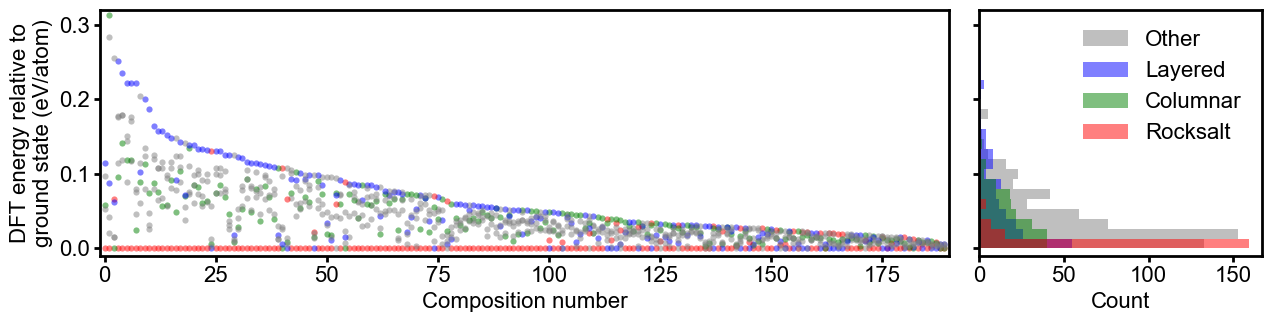

In [3]:
energy_counter_rocksalt = []
energy_counter_columnar = []
energy_counter_layered = []
energy_counter_other = []
temp_list_highest_normalized_dft_energies = []

for index, row in perovskite_ordering_data.iterrows():

    dft_ordering_types = row['dft_ordering_type']
    dft_energies = row['dft_energy_per_atom']
    lowest_dft_energy = np.min(dft_energies)
    highest_dft_energy = np.max(dft_energies)
    temp_list_highest_normalized_dft_energies.append(highest_dft_energy - lowest_dft_energy)
    temp_energy_counter_other = []

    for k in range(len(dft_energies)):
        if dft_ordering_types[k]['B'][1] == 5:
            energy_counter_rocksalt.append((dft_energies[k] - lowest_dft_energy))
        elif dft_ordering_types[k]['B'][1] == 4:
            energy_counter_columnar.append((dft_energies[k] - lowest_dft_energy))
        elif dft_ordering_types[k]['B'][1] == 0:
            energy_counter_layered.append((dft_energies[k] - lowest_dft_energy))
        else:
            temp_energy_counter_other.append((dft_energies[k] - lowest_dft_energy))
        
    energy_counter_other.append(temp_energy_counter_other)        
    
sort_index_temp_list_highest_normalized_dft_energies = np.argsort(np.array(temp_list_highest_normalized_dft_energies))

fig, axs = plt.subplots(1, 2, figsize=(13, 3.5), gridspec_kw={'width_ratios': [3, 1]})
ylim = [-0.01, 0.32]

for k in range(len(sort_index_temp_list_highest_normalized_dft_energies)):
    axs[0].scatter((len(sort_index_temp_list_highest_normalized_dft_energies) - 1 - k), (energy_counter_rocksalt[sort_index_temp_list_highest_normalized_dft_energies[k]]), marker='o', linewidths=0, s=20, color='red', alpha=0.5)
    axs[0].scatter((len(sort_index_temp_list_highest_normalized_dft_energies) - 1 - k), (energy_counter_columnar[sort_index_temp_list_highest_normalized_dft_energies[k]]), marker='o', linewidths=0, s=20, color='green', alpha=0.5)
    axs[0].scatter((len(sort_index_temp_list_highest_normalized_dft_energies) - 1 - k), (energy_counter_layered[sort_index_temp_list_highest_normalized_dft_energies[k]]), marker='o', linewidths=0, s=20, color='blue', alpha=0.5)
    for j in range(3):
        axs[0].scatter((len(sort_index_temp_list_highest_normalized_dft_energies) - 1 - k), (energy_counter_other[sort_index_temp_list_highest_normalized_dft_energies[k]][j]), marker='o', linewidths=0, s=20, color='grey', alpha=0.5)

axs[0].scatter(-100, -100, color='red', linewidths=0, s=100, alpha=0.5, label='Rocksalt')
axs[0].scatter(-100, -100, color='green', linewidths=0, s=100, alpha=0.5, label='Columnar')
axs[0].scatter(-100, -100, color='blue', linewidths=0, s=100, alpha=0.5, label='Layered')
axs[0].scatter(-100, -100, color='grey', linewidths=0, s=100, alpha=0.5, label='Other')           
axs[0].set(xlabel='Composition number', ylabel='DFT energy relative to\nground state (eV/atom)', xlim=[-1, len(perovskite_ordering_data.index.values)], ylim=ylim);
axs[0].legend(frameon=False).remove()

axs[1].hist(np.array(energy_counter_other).flatten(), bins=30, range=(0, 0.4), color='grey', alpha=0.5, label='Other', orientation='horizontal');
axs[1].hist(np.array(energy_counter_layered).flatten(), bins=30, range=(0, 0.4), color='blue', alpha=0.5, label='Layered', orientation='horizontal');
axs[1].hist(np.array(energy_counter_columnar).flatten(), bins=30, range=(0, 0.4), color='green', alpha=0.5, label='Columnar', orientation='horizontal');
axs[1].hist(np.array(energy_counter_rocksalt).flatten(), bins=30, range=(0, 0.4), color='red', alpha=0.5, label='Rocksalt', orientation='horizontal');
axs[1].set(xlabel='Count', ylim=ylim);
axs[1].legend(frameon=False);
axs[1].set_yticklabels([])

plt.tight_layout()

# Fig. 2

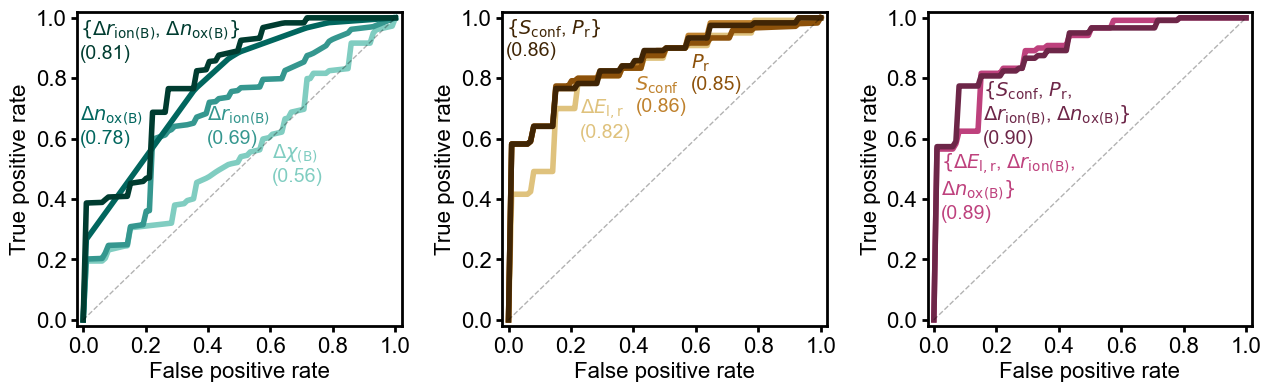

In [4]:
descriptors_keys = ['Atomic', 'DFT', 'Multi']

descriptors = {
    'DFT': {
        '$\Delta E_{\mathrm{l,r}}$': ['dft_rocksalt_layered_diff'],
        '$S_{\mathrm{conf}}$': ['dft_normalized_conf_entropy'],
        '$P_{\mathrm{r}}$': ['dft_rocksalt_prob'],
        '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob']
    },
    'Atomic': {
        '$\Delta \chi_{\mathrm{(B)}}$': ['B_electronegativity_diff'],
        '$\Delta r_{\mathrm{ion(B)}}$': ['B_ionic_radius_diff'],
        '$\Delta n_{\mathrm{ox(B)}}$': ['B_ox_state_diff'],
        '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff']
    },
    'Multi': {
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': ['dft_rocksalt_layered_diff', 'B_ionic_radius_diff', 'B_ox_state_diff'],
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob', 'B_ionic_radius_diff', 'B_ox_state_diff']        
    }
}

colors = {
    'DFT': {
        '$\Delta E_{\mathrm{l,r}}$': '#dfc27d',
        '$S_{\mathrm{conf}}$': '#bf812d',
        '$P_{\mathrm{r}}$': '#8c510a',
        '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': '#402505'
    },
    'Atomic': {
        '$\Delta \chi_{\mathrm{(B)}}$': '#80cdc1',
        '$\Delta r_{\mathrm{ion(B)}}$': '#35978f',
        '$\Delta n_{\mathrm{ox(B)}}$': '#01665e',
        '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': '#003c30'
    },
    'Multi': {
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': '#be417d',       
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': '#6d2648'
    }
}

xys = {
    'DFT': {
        '$\Delta E_{\mathrm{l,r}}$': (0.24,0.6),
        '$S_{\mathrm{conf}}$': (0.41,0.68),
        '$P_{\mathrm{r}}$': (0.58,0.75),
        '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': (0.01,0.86)
    },
    'Atomic': {
        '$\Delta \chi_{\mathrm{(B)}}$': (0.6,0.46),
        '$\Delta r_{\mathrm{ion(B)}}$': (0.4,0.58),
        '$\Delta n_{\mathrm{ox(B)}}$': (0.01,0.58),
        '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': (0.01,0.85)
    },
    'Multi': {
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': (0.04,0.34),       
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': (0.17,0.58)
    }
}

fig, axs = plt.subplots(1, 3, figsize=(13, 4.2))

for i in range(len(descriptors_keys)):
    temp_key = descriptors_keys[i]
    for j in range(len(descriptors[temp_key].keys())):
        label = list(descriptors[temp_key].keys())[j]
        descriptor_set = descriptors[temp_key][label]
        X = perovskite_ordering_data[descriptor_set].to_numpy()
        y = perovskite_ordering_data['y_true'].to_numpy()
        cross_val_analysis_result = cross_val_analysis(X, y);
        roc_auc(cross_val_analysis_result,  axs[i], label, colors[temp_key][label], xys[temp_key][label], annotate=True)
    
    axs[i].plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.3)
    axs[i].set(xlabel='False positive rate', ylabel='True positive rate', xlim=[-0.02, 1.02], ylim=[-0.02, 1.02]);
    axs[i].xaxis.set_ticks(np.arange(0, 1.05, 0.2))
    axs[i].yaxis.set_ticks(np.arange(0, 1.05, 0.2))

plt.tight_layout()

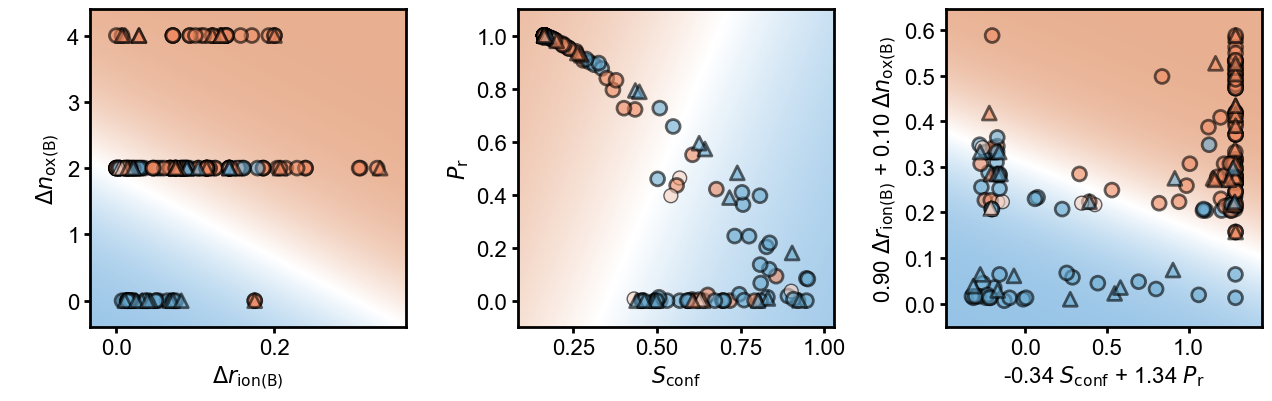

In [5]:
descriptors = {
    '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff'],
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob'],
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$, $\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob', 'B_ionic_radius_diff', 'B_ox_state_diff']        
}

colorbar_decision = LinearSegmentedColormap.from_list('colorbar_decision', (
    (0.000, (0.588, 0.765, 0.902)),
    (0.500, (1.000, 1.000, 1.000)),
    (1.000, (0.910, 0.686, 0.565))))

fig, axs = plt.subplots(1, 3, figsize=(13, 4.3))

for i in range(len(descriptors.keys())):
    label = list(descriptors.keys())[i]
    descriptor_set = descriptors[label]
    X = perovskite_ordering_data[descriptor_set].to_numpy()
    y = perovskite_ordering_data['y_true'].to_numpy()
    exp_ordering_param = perovskite_ordering_data['exp_ordering_parameter'].to_numpy()
    plot_boundaries(X, y, axs[i], descriptor_set, colorbar_decision, exp_ordering_param)

plt.subplots_adjust(left=0.4, right=0.6, wspace=0)
plt.tight_layout()

# Fig. S2

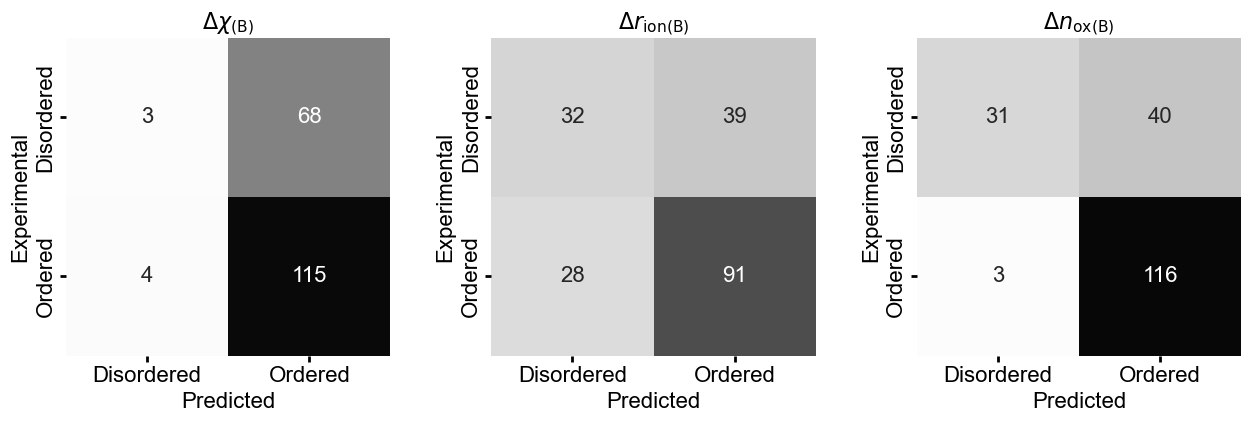

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5))

descriptors = {
    '$\Delta \chi_{\mathrm{(B)}}$': ['B_electronegativity_diff'],
    '$\Delta r_{\mathrm{ion(B)}}$': ['B_ionic_radius_diff'],
    '$\Delta n_{\mathrm{ox(B)}}$': ['B_ox_state_diff']        
}

for i, key in enumerate(descriptors.keys()):
    descriptor_set = descriptors[key]
    X = perovskite_ordering_data[descriptor_set].to_numpy()
    y = perovskite_ordering_data['y_true'].to_numpy()
    cross_val_analysis_result = cross_val_analysis(X, y);
    matrix = confusion_matrix(cross_val_analysis_result['actual_classes'], cross_val_analysis_result['predicted_classes'], labels=sorted_labels)
    sns.heatmap(matrix, vmin=0, vmax=max(list(collections.Counter(list(cross_val_analysis_result['actual_classes'])).values())), annot=True, xticklabels=plot_labels, yticklabels=plot_labels, cmap='Greys', fmt='g', cbar=False, ax=axs[i])
    axs[i].set(xlabel='Predicted', ylabel='Experimental');
    axs[i].set_title(key, size=16)

plt.subplots_adjust(left=0.1, right=0.9, wspace=5)
plt.tight_layout()

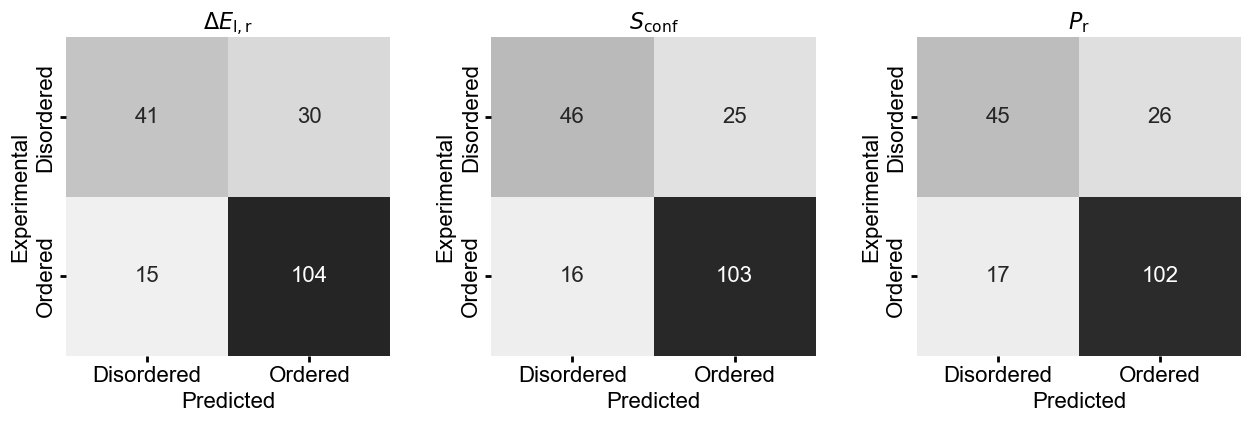

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5))

descriptors = {
    '$\Delta E_{\mathrm{l,r}}$': ['dft_rocksalt_layered_diff'],
    '$S_{\mathrm{conf}}$': ['dft_normalized_conf_entropy'],
    '$P_{\mathrm{r}}$': ['dft_rocksalt_prob']
}

for i, key in enumerate(descriptors.keys()):
    descriptor_set = descriptors[key]
    X = perovskite_ordering_data[descriptor_set].to_numpy()
    y = perovskite_ordering_data['y_true'].to_numpy()
    cross_val_analysis_result = cross_val_analysis(X, y);
    matrix = confusion_matrix(cross_val_analysis_result['actual_classes'], cross_val_analysis_result['predicted_classes'], labels=sorted_labels)
    sns.heatmap(matrix, vmin=0, vmax=max(list(collections.Counter(list(cross_val_analysis_result['actual_classes'])).values())), annot=True, xticklabels=plot_labels, yticklabels=plot_labels, cmap='Greys', fmt='g', cbar=False, ax=axs[i])
    axs[i].set(xlabel='Predicted', ylabel='Experimental');
    axs[i].set_title(key, size=16)

plt.subplots_adjust(left=0.1, right=0.9, wspace=5)
plt.tight_layout()

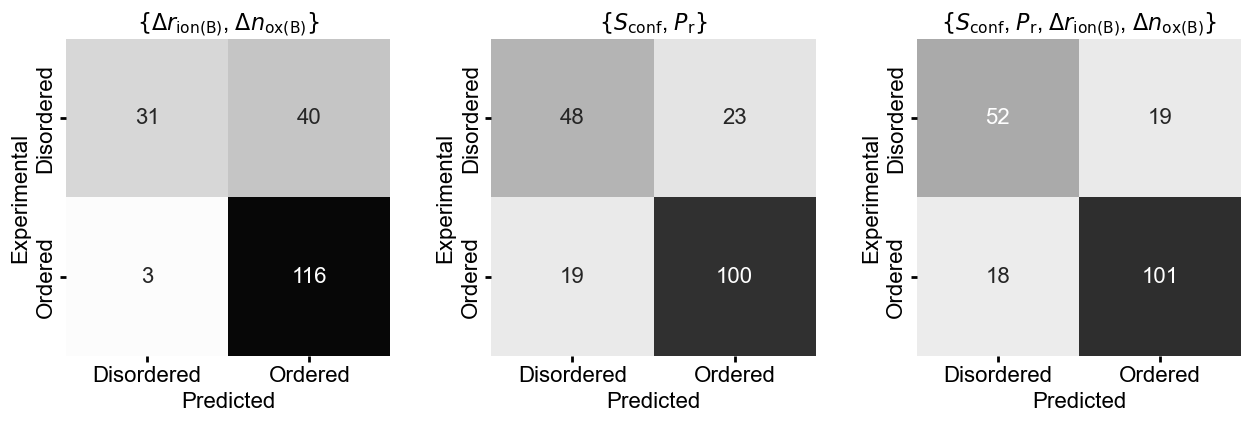

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5))

descriptors = {
'$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff'],
'$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob'],
'$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$, $\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob', 'B_ionic_radius_diff', 'B_ox_state_diff']        
}

for i, key in enumerate(descriptors.keys()):
    descriptor_set = descriptors[key]
    X = perovskite_ordering_data[descriptor_set].to_numpy()
    y = perovskite_ordering_data['y_true'].to_numpy()
    cross_val_analysis_result = cross_val_analysis(X, y);
    matrix = confusion_matrix(cross_val_analysis_result['actual_classes'], cross_val_analysis_result['predicted_classes'], labels=sorted_labels)
    sns.heatmap(matrix, vmin=0, vmax=max(list(collections.Counter(list(cross_val_analysis_result['actual_classes'])).values())), annot=True, xticklabels=plot_labels, yticklabels=plot_labels, cmap='Greys', fmt='g', cbar=False, ax=axs[i])
    axs[i].set(xlabel='Predicted', ylabel='Experimental');
    axs[i].set_title(key, size=16)

plt.subplots_adjust(left=0.1, right=0.9, wspace=5)
plt.tight_layout()

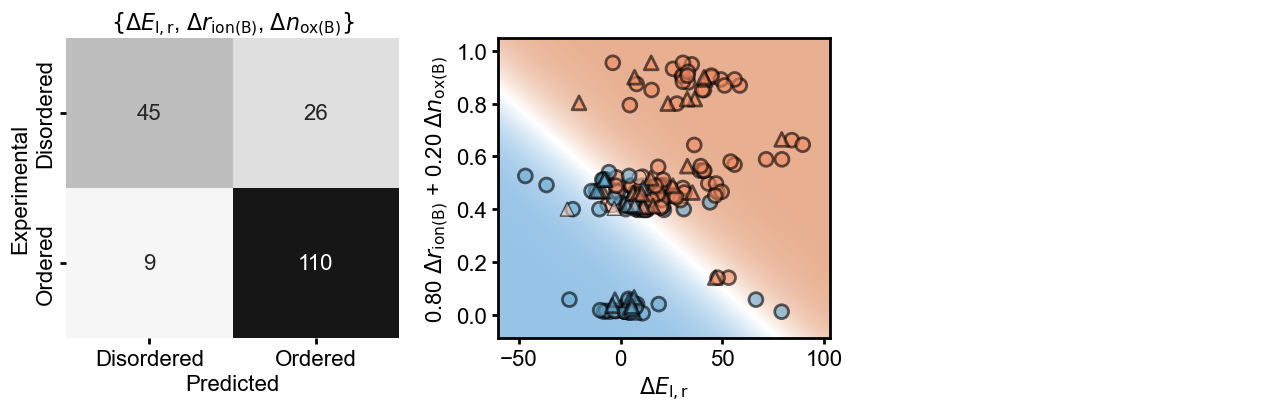

In [9]:
descriptors = {
    '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff'],
    '$\Delta E_{\mathrm{l,r}}$': ['dft_rocksalt_layered_diff'],
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': ['dft_rocksalt_layered_diff', 'B_ionic_radius_diff', 'B_ox_state_diff']
}

colors = {
    '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': 'silver',
    '$\Delta E_{\mathrm{l,r}}$': 'grey',
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': 'black'        
}

fig, axs = plt.subplots(1, 3, figsize=(13, 4.4))

for key in descriptors.keys():
    descriptor_set = descriptors[key]
    X = perovskite_ordering_data[descriptor_set].to_numpy()
    y = perovskite_ordering_data['y_true'].to_numpy()
    exp_ordering_param = perovskite_ordering_data['exp_ordering_parameter'].to_numpy()
    cross_val_analysis_result = cross_val_analysis(X, y);

matrix = confusion_matrix(cross_val_analysis_result['actual_classes'], cross_val_analysis_result['predicted_classes'], labels=sorted_labels)
sns.heatmap(matrix, vmin=0, vmax=max(list(collections.Counter(list(cross_val_analysis_result['actual_classes'])).values())), annot=True, xticklabels=plot_labels, yticklabels=plot_labels, cmap='Greys', fmt='g', cbar=False, ax=axs[0])
axs[0].set(xlabel='Predicted', ylabel='Experimental');
axs[0].set_title('$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$', size=16)

colorbar_decision = LinearSegmentedColormap.from_list('colorbar_decision', (
    (0.000, (0.588, 0.765, 0.902)),
    (0.500, (1.000, 1.000, 1.000)),
    (1.000, (0.910, 0.686, 0.565))))

plot_boundaries_additional(X, y, axs[1], descriptor_set, colorbar_decision, exp_ordering_param)

axs[2].set_axis_off()

plt.tight_layout()

# Fig. S3

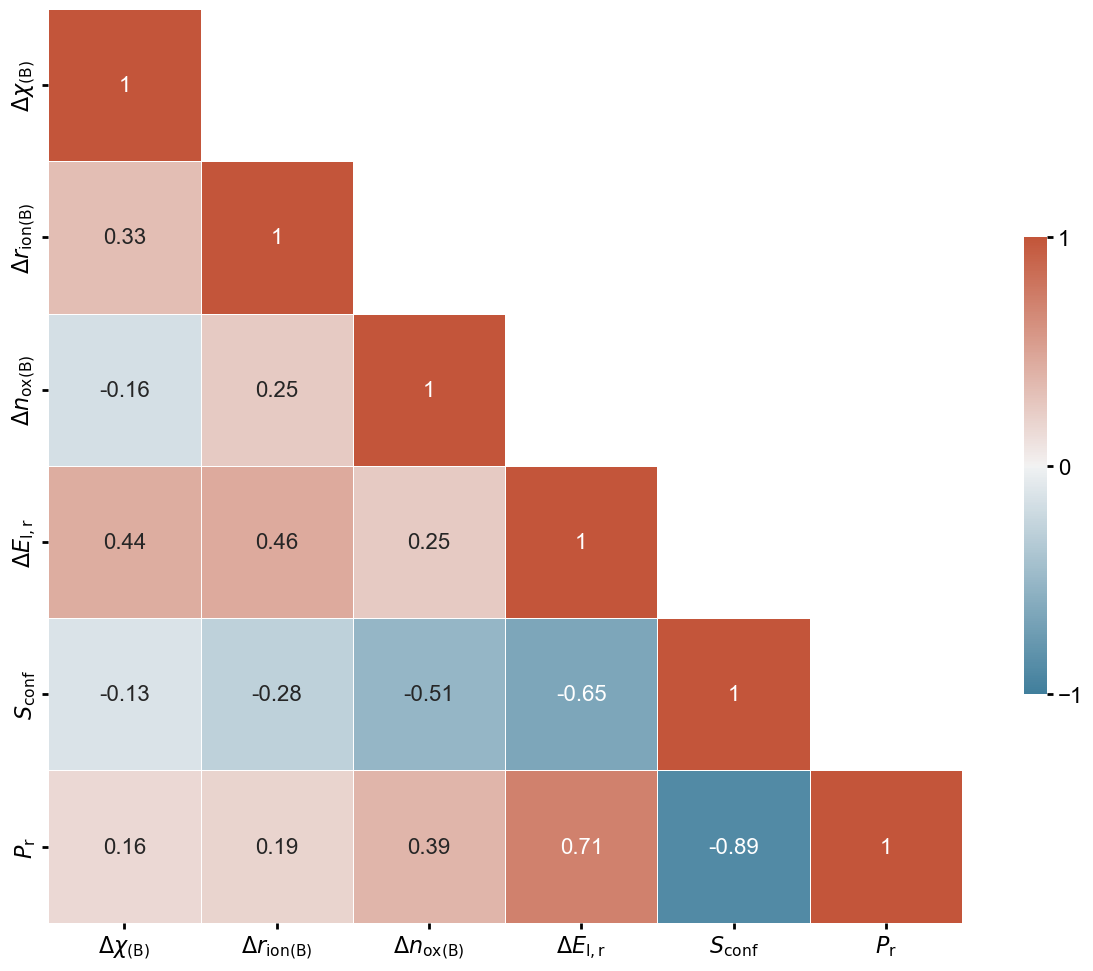

In [10]:
df_cut = perovskite_ordering_data[[
    'B_electronegativity_diff', 'B_ionic_radius_diff', 'B_ox_state_diff',
    'dft_rocksalt_layered_diff', 'dft_normalized_conf_entropy', 'dft_rocksalt_prob'
]]

corr = df_cut.astype(float).corr(method='pearson')
mask = ~np.tril(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ticklabels = (['$\Delta \chi_{\mathrm{(B)}}$', '$\Delta r_{\mathrm{ion(B)}}$', '$\Delta n_{\mathrm{ox(B)}}$', 
               '$\Delta E_{\mathrm{l,r}}$', '$S_{\mathrm{conf}}$', '$P_{\mathrm{r}}$'])
ax = sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, vmax=1, vmin=-1, center=0, square=True, annot=True,
            linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=ticklabels, yticklabels=ticklabels)
ax.collections[0].colorbar.set_ticks([-1,0,1])

plt.tight_layout()

# Fig. S4

In [11]:
perovskite_ordering_data_filtered = perovskite_ordering_data.drop(perovskite_ordering_data[
    (perovskite_ordering_data['exp_ordering_parameter'] > 0) & 
    (perovskite_ordering_data['exp_ordering_parameter'] < 0.5)
].index)

print('Number of compositions after filtering:', len(perovskite_ordering_data_filtered.index.values))

Number of compositions after filtering: 182


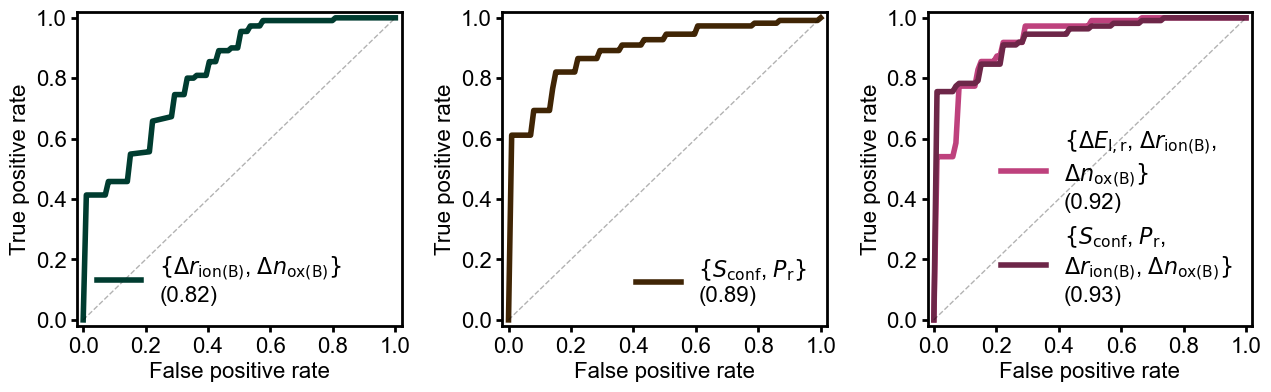

In [12]:
descriptors_keys = ['Atomic', 'DFT', 'Multi']

descriptors = {
    'DFT': {
        '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob']
    },
    'Atomic': {
        '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff']
    },
    'Multi': {
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': ['dft_rocksalt_layered_diff', 'B_ionic_radius_diff', 'B_ox_state_diff'],
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob', 'B_ionic_radius_diff', 'B_ox_state_diff']        
    }
}

colors = {
    'DFT': {
        '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': '#402505'
    },
    'Atomic': {
        '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': '#003c30'
    },
    'Multi': {
    '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$': '#be417d',       
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': '#6d2648'
    }
}

fig, axs = plt.subplots(1, 3, figsize=(13, 4.2))

for i in range(len(descriptors_keys)):
    temp_key = descriptors_keys[i]
    for j in range(len(descriptors[temp_key].keys())):
        label = list(descriptors[temp_key].keys())[j]
        descriptor_set = descriptors[temp_key][label]
        X = perovskite_ordering_data_filtered[descriptor_set].to_numpy()
        y = perovskite_ordering_data_filtered['y_true'].to_numpy()
        cross_val_analysis_result = cross_val_analysis(X, y);
        roc_auc(cross_val_analysis_result,  axs[i], label, colors[temp_key][label])
    
    axs[i].plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.3)
    axs[i].set(xlabel='False positive rate', ylabel='True positive rate', xlim=[-0.02, 1.02], ylim=[-0.02, 1.02]);
    axs[i].xaxis.set_ticks(np.arange(0, 1.05, 0.2))
    axs[i].yaxis.set_ticks(np.arange(0, 1.05, 0.2))
    axs[i].legend(frameon=False);

plt.tight_layout()

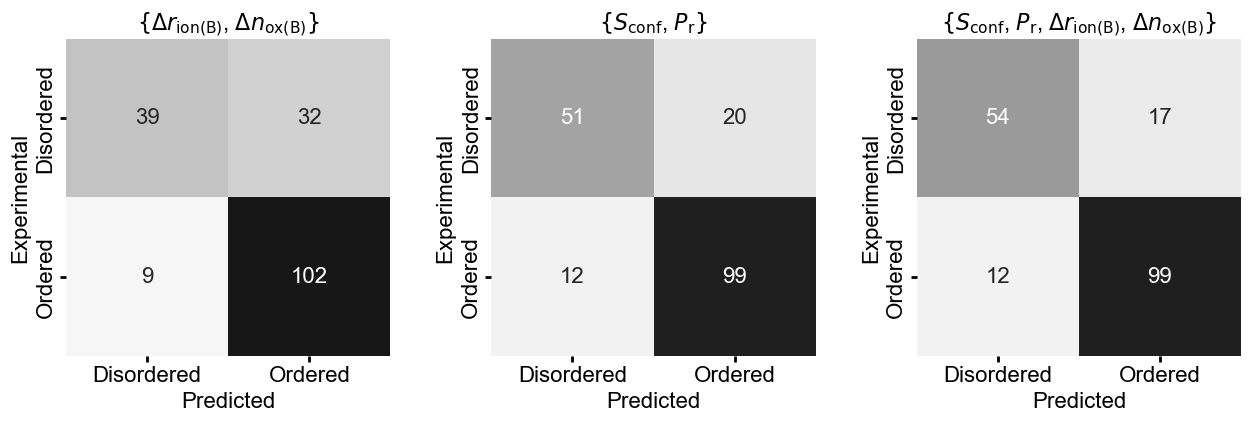

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5))

descriptors = {
'$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['B_ionic_radius_diff', 'B_ox_state_diff'],
'$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob'],
'$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}$, $\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob', 'B_ionic_radius_diff', 'B_ox_state_diff']        
}

for i, key in enumerate(descriptors.keys()):
    descriptor_set = descriptors[key]
    X = perovskite_ordering_data_filtered[descriptor_set].to_numpy()
    y = perovskite_ordering_data_filtered['y_true'].to_numpy()
    cross_val_analysis_result = cross_val_analysis(X, y);
    matrix = confusion_matrix(cross_val_analysis_result['actual_classes'], cross_val_analysis_result['predicted_classes'], labels=sorted_labels)
    sns.heatmap(matrix, vmin=0, vmax=max(list(collections.Counter(list(cross_val_analysis_result['actual_classes'])).values())), annot=True, xticklabels=plot_labels, yticklabels=plot_labels, cmap='Greys', fmt='g', cbar=False, ax=axs[i])
    axs[i].set(xlabel='Predicted', ylabel='Experimental');
    axs[i].set_title(key, size=16)

plt.subplots_adjust(left=0.1, right=0.9, wspace=5)
plt.tight_layout()

# Figs. 3 and S5

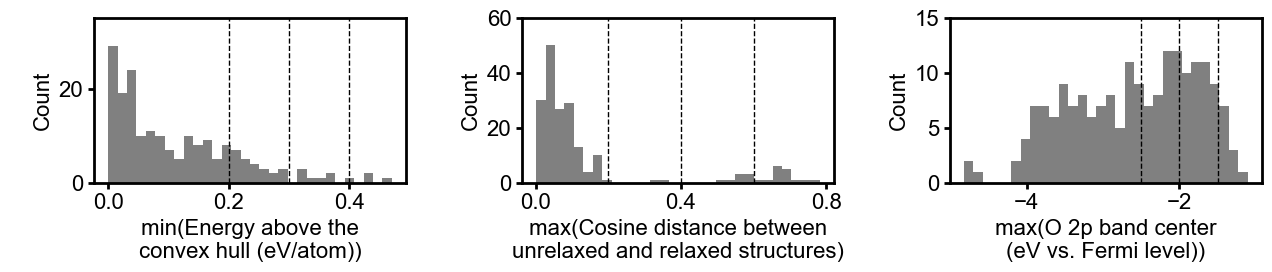

In [14]:
plot_settings = {
    'min_dft_e_hull': {
        'xlabel': 'min(Energy above the\nconvex hull (eV/atom))',
        'threshold': [0.2, 0.3, 0.4, 99999],
        'hist_ylim': 35,
        'plot_label': 'min(Energy above\nthe convex hull)'
    },
    'max_unrelaxed_opt_cosine_distance': {
        'xlabel': 'max(Cosine distance between\nunrelaxed and relaxed structures)',
        'threshold': [0.2, 0.4, 0.6, 99999],
        'hist_ylim': 60,
        'plot_label': 'max(Cosine\ndistance)'
    },
    'max_O_p_band_center': {
        'xlabel': 'max(O 2p band center\n(eV vs. Fermi level))',
        'threshold': [-2.5, -2.0, -1.5, 99999],
        'hist_ylim': 15,
        'plot_label': 'max(O 2p\nband center)'
    }
}

descriptors = {
    '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': {
        'details': ['B_ionic_radius_diff', 'B_ox_state_diff'],
        'colors': ['#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
    },
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': {
        'details': ['dft_normalized_conf_entropy', 'dft_rocksalt_prob'],
        'colors': ['#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
    }
}

fig, axs = plt.subplots(1, 3, figsize=(13, 3))

for i, key in enumerate(plot_settings.keys()):
    axs[i].hist(perovskite_ordering_data[key], bins=30, log=False, color='grey');
    for threshold in plot_settings[key]['threshold']:
        if threshold != 99999:
            axs[i].vlines(threshold, 0, 100, colors='black', linestyles='dashed', linewidth=1)
    axs[i].set(xlabel=plot_settings[key]['xlabel'], ylabel='\nCount', ylim=[0,plot_settings[key]['hist_ylim']]);

axs[1].set_xticks([0, 0.4, 0.8])

plt.tight_layout()

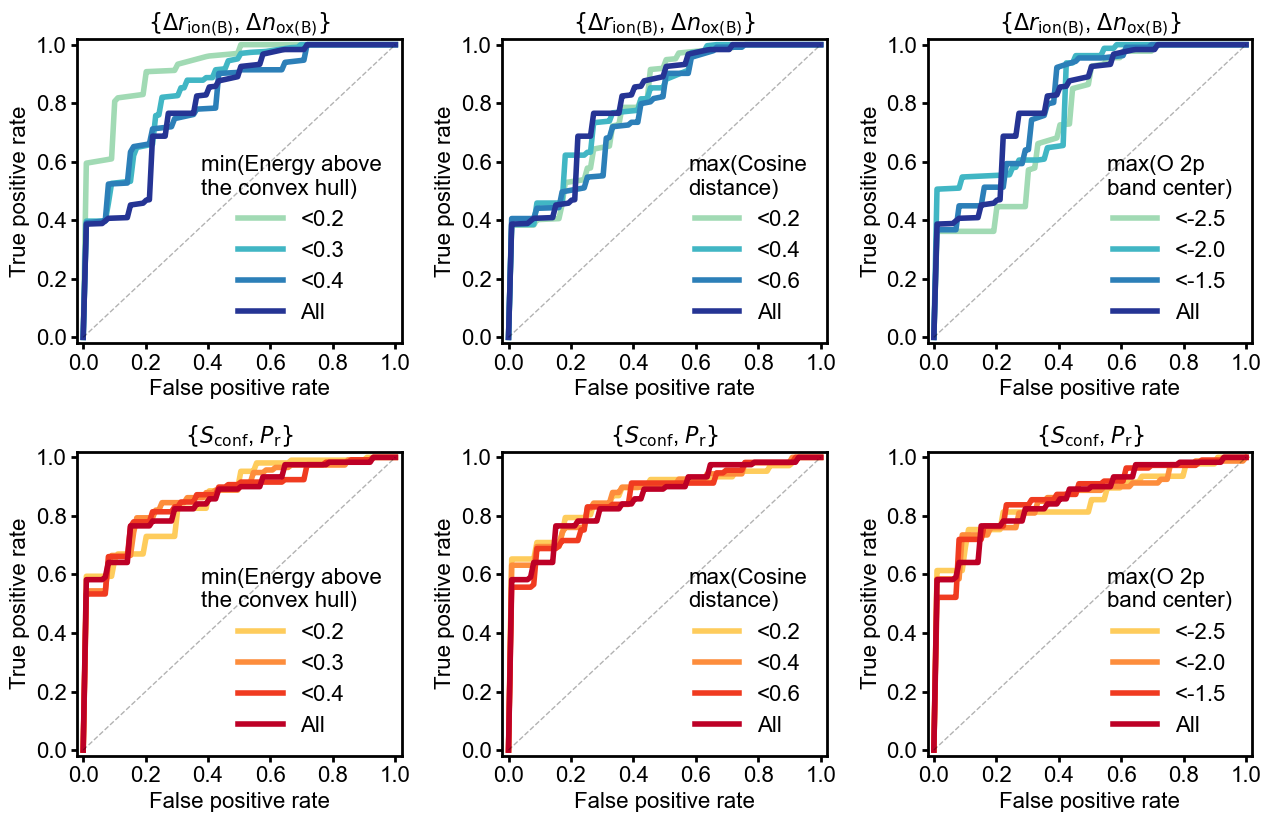

In [15]:
auc_results = {}
for key in plot_settings.keys():
    auc_results[key] = {}
    for descriptor in descriptors.keys():
        auc_results[key][descriptor] = {
            'threshold': [],
            'mean_auc': [],
            'std_auc': [],
            'num_data': []
        }

fig, axs = plt.subplots(2, 3, figsize=(13, 8.5))

for i, key in enumerate(plot_settings.keys()):
    for j, threshold in enumerate(plot_settings[key]['threshold']):
        perovskite_ordering_data_cut = perovskite_ordering_data[perovskite_ordering_data[key] <= threshold]
        temp_auc_results = plot_posthoc_analysis(perovskite_ordering_data_cut, axs, i, key, j, threshold, descriptors, plot_settings)
        for descriptor in descriptors.keys():
            if threshold == 99999:
                threshold_label = 'All'
            else:
                threshold_label = '<{:.1f}'.format(threshold)
            auc_results[key][descriptor]['threshold'].append(threshold_label)
            auc_results[key][descriptor]['mean_auc'].append(temp_auc_results[descriptor]['mean_auc'])
            auc_results[key][descriptor]['std_auc'].append(temp_auc_results[descriptor]['std_auc'])
            auc_results[key][descriptor]['num_data'].append(temp_auc_results[descriptor]['num_data'])

plt.tight_layout()

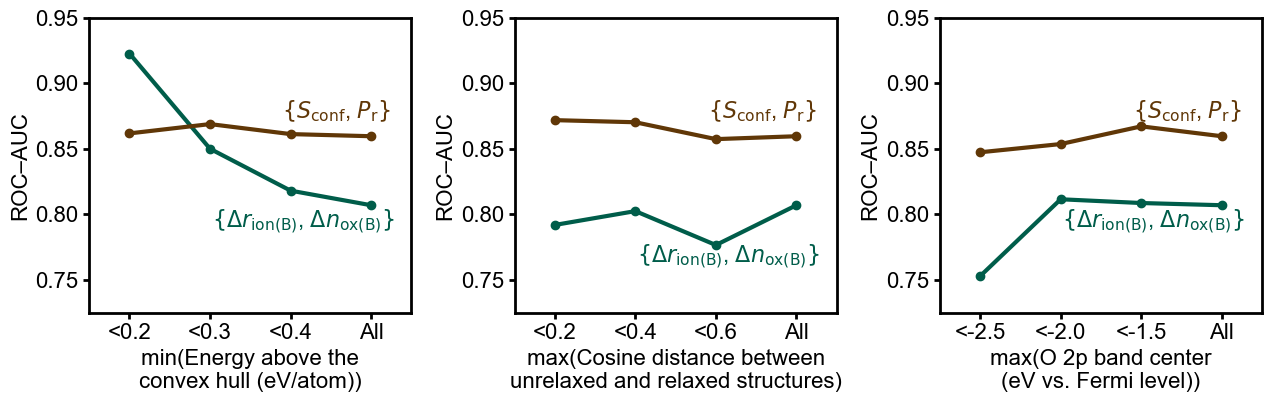

In [16]:
colors = {
    '$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$': '#603707',
    '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$': '#005d4a'
}

fig, axs = plt.subplots(1, 3, figsize=(13, 4.3))

for i, key in enumerate(plot_settings.keys()):
    for descriptor in descriptors.keys():
        axs[i].plot(
            auc_results[key][descriptor]['threshold'], auc_results[key][descriptor]['mean_auc'],
            linestyle='solid', marker='o', c=colors[descriptor]
        )
    axs[i].set(xlabel=plot_settings[key]['xlabel'], ylabel='ROC–AUC', xlim=[-0.5, 3.5], ylim=[0.725,0.95]);
    axs[i].annotate('$\{S_{\mathrm{conf}}$, $P_{\mathrm{r}}\}$', xy=(0.6,0.66), xycoords='axes fraction', c='#603707')
    if i == 1:
        axs[i].annotate('$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$', xy=(0.38,0.17), xycoords='axes fraction', c='#005d4a')    
    else:
        axs[i].annotate('$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$', xy=(0.38,0.29), xycoords='axes fraction', c='#005d4a')
    
plt.tight_layout()

# Fig. 4

In [17]:
best_sisso_results = {}

with open('../data/sisso_results/No_DFT_DescDim1_SoMethodconvex_hull_Weighted_.json', 'r') as f:
    best_sisso_results['no_dft_1d'] = json.load(f)
    
with open('../data/sisso_results/DFT_DescDim1_SoMethoddecision_tree_Weighted_.json', 'r') as f:
    best_sisso_results['dft_1d'] = json.load(f)

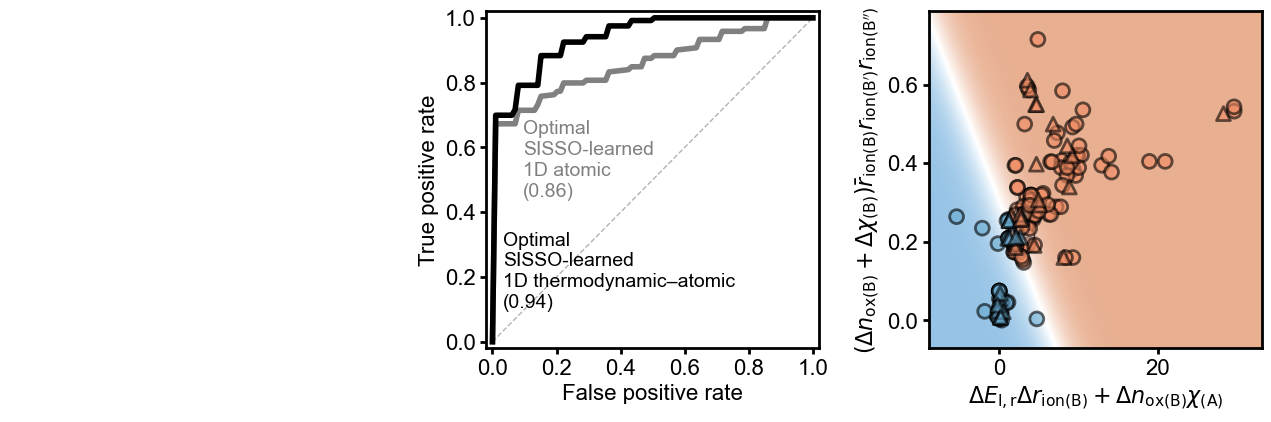

In [18]:
descriptor_names = {
    'SISSO_no_dft_best': r'$(\Delta n_{\mathrm{ox(B)}} + \Delta \chi_{\mathrm{(B)}}) \bar{r}_{\mathrm{ion(B)}} r_\mathrm{ion(B^{\prime})} r_\mathrm{ion(B^{\prime\prime})}$',
    'SISSO_dft_best': '$\Delta E_{\mathrm{l,r}} \Delta r_{\mathrm{ion(B)}} + \Delta n_{\mathrm{ox(B)}} \chi_{\mathrm{(A)}}$'
} 

colorbar_decision = LinearSegmentedColormap.from_list('colorbar_decision', (
    (0.000, (0.588, 0.765, 0.902)),
    (0.500, (1.000, 1.000, 1.000)),
    (1.000, (0.910, 0.686, 0.565))))

fig, axs = plt.subplots(1, 3, figsize=(13, 4.5), gridspec_kw={'width_ratios':[1.1, 1, 1]})

axs[0].set_axis_off()

sisso_types = ['no_dft_1d', 'dft_1d']
temp_settings = {
    'no_dft_1d': {
        'label': 'Optimal\nSISSO-learned\n1D atomic',
        'color': 'grey',
        'xy': (0.11,0.45)
    },
    'dft_1d': {
        'label': 'Optimal\nSISSO-learned\n1D thermodynamic–atomic',
        'color': 'black',
        'xy': (0.05,0.12) 
    }
}

for sisso_type in sisso_types:
    temp_result = best_sisso_results[sisso_type]
    cv_result = {'roc': {}}
    
    for i in range(5):
        cv_result['roc'][i] = {
            'fpr': temp_result['fpr'][i], 
            'tpr': temp_result['tpr'][i], 
            'auc': auc(temp_result['fpr'][i], temp_result['tpr'][i])
        }
    
    roc_auc(cv_result, axs[1], temp_settings[sisso_type]['label'], temp_settings[sisso_type]['color'], 
            temp_settings[sisso_type]['xy'], annotate=True)

axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.3)
axs[1].set(xlabel='False positive rate', ylabel='True positive rate', xlim=[-0.02, 1.02], ylim=[-0.02, 1.02])
axs[1].xaxis.set_ticks(np.arange(0, 1.05, 0.2))
axs[1].yaxis.set_ticks(np.arange(0, 1.05, 0.2))

SISSO_no_dft_best = (perovskite_ordering_data['B_ionic_radius_average'] * perovskite_ordering_data['B_ionic_radius_multiply']) * (perovskite_ordering_data['B_ox_state_diff'] + perovskite_ordering_data['B_electronegativity_diff'])
SISSO_dft_best = (perovskite_ordering_data['B_ionic_radius_diff'] * perovskite_ordering_data['dft_rocksalt_layered_diff']) + (perovskite_ordering_data['B_ox_state_diff'] * perovskite_ordering_data['A_electronegativity'])


X = np.array([list(SISSO_dft_best), list(SISSO_no_dft_best)]).T
y = perovskite_ordering_data['y_true'].to_numpy()
exp_ordering_param = perovskite_ordering_data['exp_ordering_parameter'].to_numpy()

descriptor_set = ['SISSO_dft_best', 'SISSO_no_dft_best']
plot_boundaries_sisso(X, y, axs[2], descriptor_set, colorbar_decision, exp_ordering_param, descriptor_names)

plt.tight_layout()

# Figs. 5, S6, and S7

In [19]:
sampling_types_without_descriptors = [
    'random',
    'rocksalt',
    'rocksalt_random',
    'rocksalt_layered'
]

sampling_types_with_descriptors = [
    'atomic_descriptor_rocksalt_random',
    'atomic_descriptor_rocksalt_all',
    'dft_atomic_descriptor_rocksalt_layered_random',
    'dft_atomic_descriptor_rocksalt_layered_all'
]

descriptor_sets_with_descriptors = {
    'atomic_descriptor_rocksalt_random': ['B_ionic_radius_diff', 'B_ox_state_diff'],
    'atomic_descriptor_rocksalt_all': ['B_ionic_radius_diff', 'B_ox_state_diff'],
    'dft_atomic_descriptor_rocksalt_layered_random': ['B_ionic_radius_diff', 'B_ox_state_diff', 'dft_rocksalt_layered_diff'],
    'dft_atomic_descriptor_rocksalt_layered_all': ['B_ionic_radius_diff', 'B_ox_state_diff', 'dft_rocksalt_layered_diff']
}

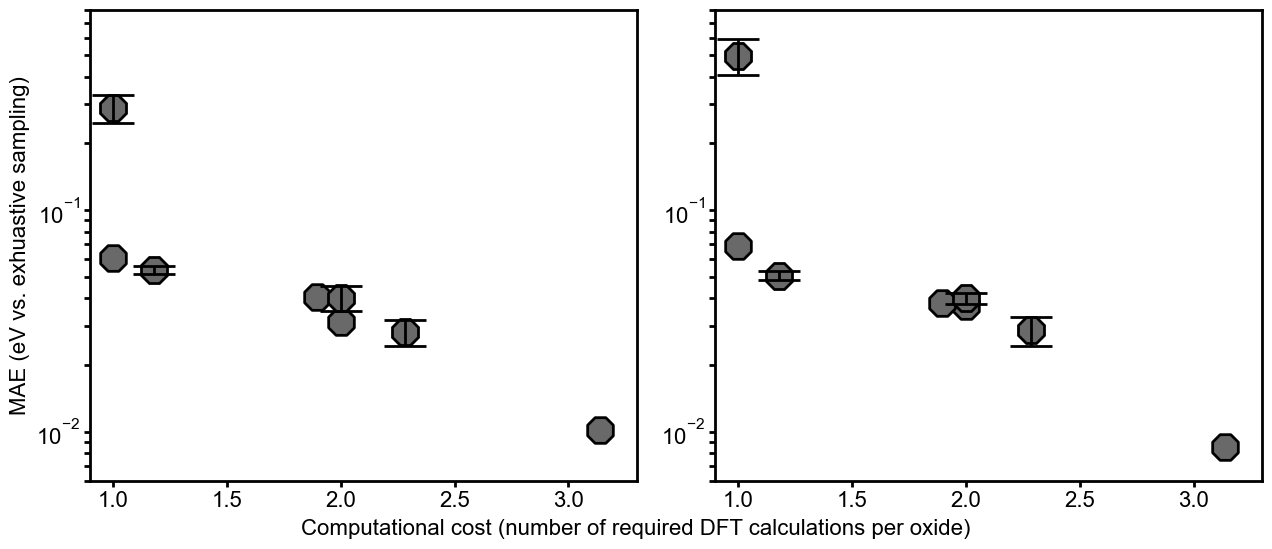

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5.75))
repeat_random_times=50

prop = 'O_p_band_center'
marker = '8'
properties_sampled, costs = sampling_test_without_descriptors(perovskite_ordering_data, prop, sampling_types_without_descriptors, repeat_random_times=repeat_random_times)
error_cost_tradeoff(properties_sampled, costs, sampling_types_without_descriptors, axs[0], marker=marker)
properties_sampled, costs = sampling_test_with_descriptors(perovskite_ordering_data, prop, sampling_types_with_descriptors, descriptor_sets_with_descriptors, repeat_random_times=repeat_random_times)
error_cost_tradeoff(properties_sampled, costs, sampling_types_with_descriptors, axs[0], marker=marker)

prop = 'bandgap'
marker = '8'
properties_sampled, costs = sampling_test_without_descriptors(perovskite_ordering_data, prop, sampling_types_without_descriptors, repeat_random_times=repeat_random_times)
error_cost_tradeoff(properties_sampled, costs, sampling_types_without_descriptors, axs[1], marker=marker)
properties_sampled, costs = sampling_test_with_descriptors(perovskite_ordering_data, prop, sampling_types_with_descriptors, descriptor_sets_with_descriptors, repeat_random_times=repeat_random_times)
error_cost_tradeoff(properties_sampled, costs, sampling_types_with_descriptors, axs[1], marker=marker)

axs[0].set(ylabel='MAE (eV vs. exhuastive sampling)', xlabel=' ')
axs[1].set(xlabel=' ')
fig.text(0.5, 0.045, 'Computational cost (number of required DFT calculations per oxide)', ha='center')

plt.tight_layout()

In [21]:
prop = 'bandgap'

prop_plot_info ={
    'name_x': 'bandgap (eV)',
    'name_y': 'bandgap (eV)',
    'lim': [-0.5,4.5]
}

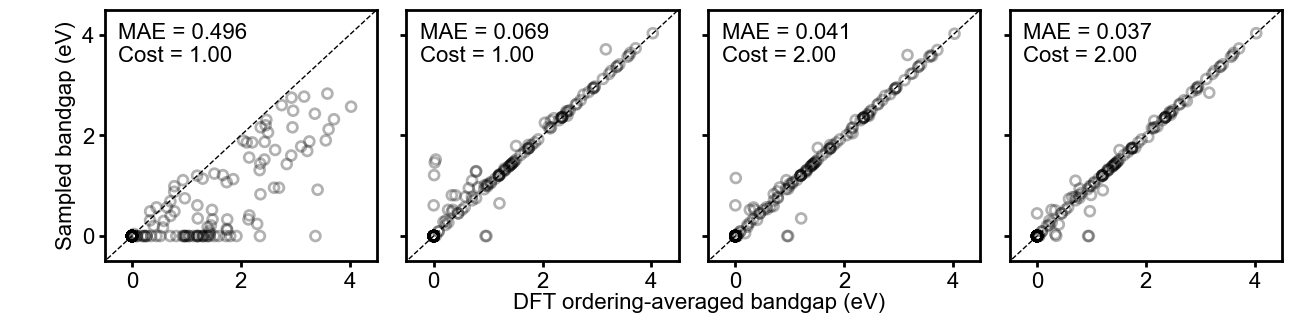

In [22]:
properties_sampled, costs = sampling_test_without_descriptors(perovskite_ordering_data, prop, sampling_types_without_descriptors)

fig, axs = plt.subplots(1, 4, figsize=(13.2, 3.3))
plot_sampling_strategies(properties_sampled, costs, sampling_types_without_descriptors, fig, axs, prop_plot_info)
plt.tight_layout()

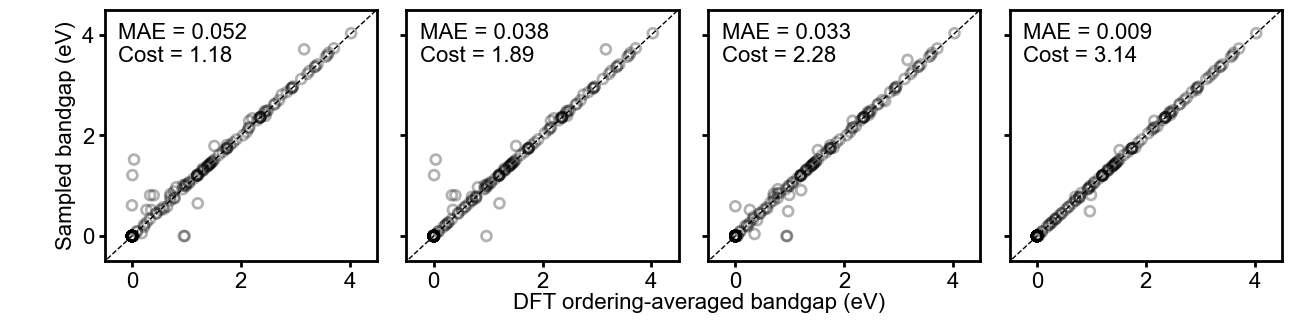

In [23]:
properties_sampled, costs = sampling_test_with_descriptors(perovskite_ordering_data, prop, sampling_types_with_descriptors, descriptor_sets_with_descriptors)

fig, axs = plt.subplots(1, 4, figsize=(13.2, 3.3))
plot_sampling_strategies(properties_sampled, costs, sampling_types_with_descriptors, fig, axs, prop_plot_info)
plt.tight_layout()

In [24]:
prop = 'O_p_band_center'

prop_plot_info ={
    'name_x': 'O 2p band center (eV vs. Fermi level)',
    'name_y': 'O 2p band center\n(eV vs. Fermi level)',
    'lim': [-5.5,-0.5]
}

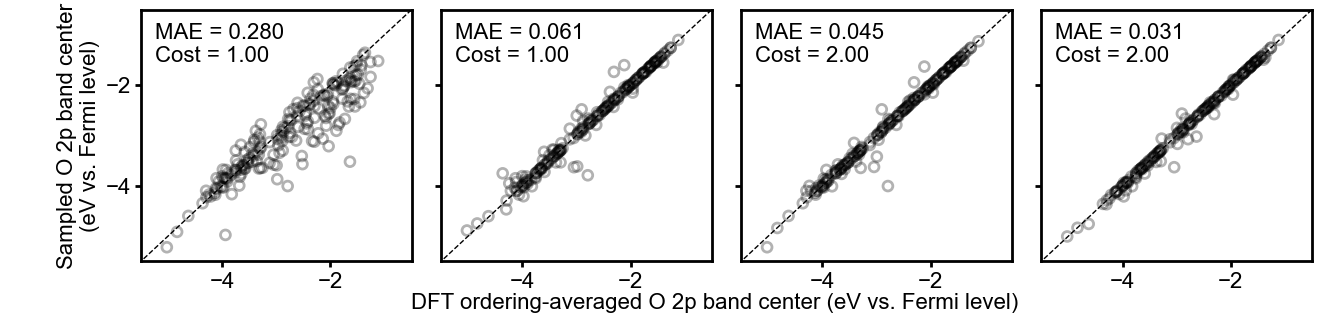

In [25]:
properties_sampled, costs = sampling_test_without_descriptors(perovskite_ordering_data, prop, sampling_types_without_descriptors)

fig, axs = plt.subplots(1, 4, figsize=(13.5, 3.3))
plot_sampling_strategies(properties_sampled, costs, sampling_types_without_descriptors, fig, axs, prop_plot_info)
plt.tight_layout()

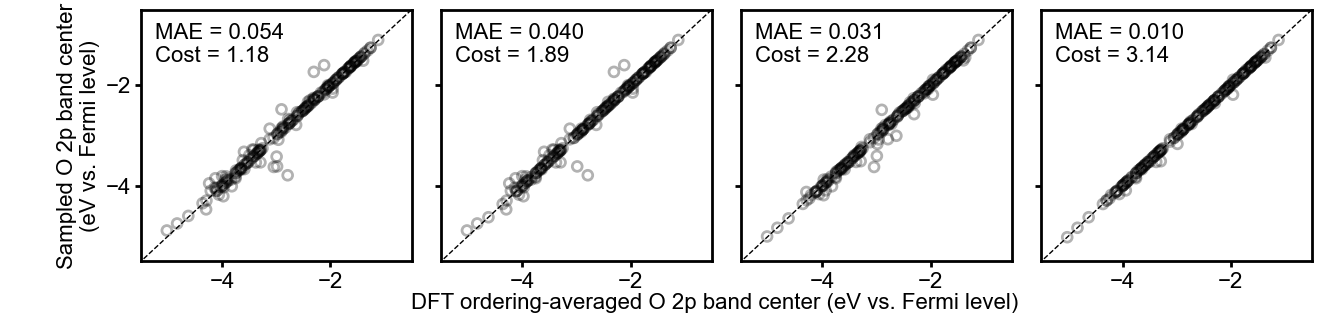

In [26]:
properties_sampled, costs = sampling_test_with_descriptors(perovskite_ordering_data, prop, sampling_types_with_descriptors, descriptor_sets_with_descriptors)

fig, axs = plt.subplots(1, 4, figsize=(13.5, 3.3))
plot_sampling_strategies(properties_sampled, costs, sampling_types_with_descriptors, fig, axs, prop_plot_info)
plt.tight_layout()